## About Principal Component Analysis

The **principal component analysis** (`PCA`) is a widely used dimensionality reduction and data analysis technique in the field of statistics and machine learning. It is used to **transform high-dimensional data** into a lower-dimensional representation while retaining as much of the original variability as possible. `PCA` achieves this by identifying the directions (principal components) in the data along which there is the **most variation**.

Representing data in smaller spaces is a technique used for important visualization and statistical analysis tasks:
- **clustering** (finding groups of similar observations) 
- **feature significance** (which variables are most important in terms of variability?) 
- **outlier detection** (find observations that stand out from the rest) 
- **exploratory analysis** (simply to better understand the dataset)

## Libraries

In order to apply `PCA` to our data, we need to use a library that supports it: in our case, this will be `scikit-learn`. 

- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart
- `scikit-learn` is used for applying the PCA to our dataset
- `numpy` is used to generate some data
- `pandas` is used to put the data into a dataframe

Don't forget to install `scikit-learn` with the `pip install -U scikit-learn` command.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Dataset

We're going to create a data set consisting of **4 variables, more or less correlated**. We want them to be correlated, because that's what makes a `PCA` relevant in an analysis. 

The data are generated using `numpy` random function `np.random.normal()` and `np.random.uniform()`. Then, we store these variables to a `pandas` dataframe. 

One important part of PCA is to **normalize the data**. In practice, it just means applying a **z-score transformation** and it is really easy. 

In [2]:
# Create our variables
sample_size = 100
random1 = np.random.uniform(30, 20, sample_size)
random2 = random1*3 + np.random.normal(10, 30, sample_size)
random3 = random2*-3 + np.random.normal(10, 100, sample_size)
random4 = random3*2 + np.random.normal(10, 500, sample_size)

df = pd.DataFrame({'variable1': random1,
                   'variable2': random2,
                   'variable3': random3,
                   'variable4': random4,})

# Scale our data using z-score normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df = pd.DataFrame(data_scaled, columns=df.columns)

## Create the PCA object

With `scikit-learn`, it's easy to make a `PCA`. Simply initialize a `PCA` object (and optionnaly specify **the number of components** you want to keep). As it's difficult to create a **visualization on more than 2 axes** (3 is possible but more complex), we'll keep only the first 2 dimensions (see graph section below). 

In [3]:
# Init a PCA object where we will only keep the 2 first principal components
pca = PCA()

# Use the `fit_transform` method from this object to our dataframe
pca_results = pca.fit_transform(df)

## Scree plot

A scree plot is actually just a [barplot](https://python-graph-gallery.com/barplot/), but usually create for factorial analysis like PCA. In this context, it gives us the information of *'how much inertia each component has?'*. 

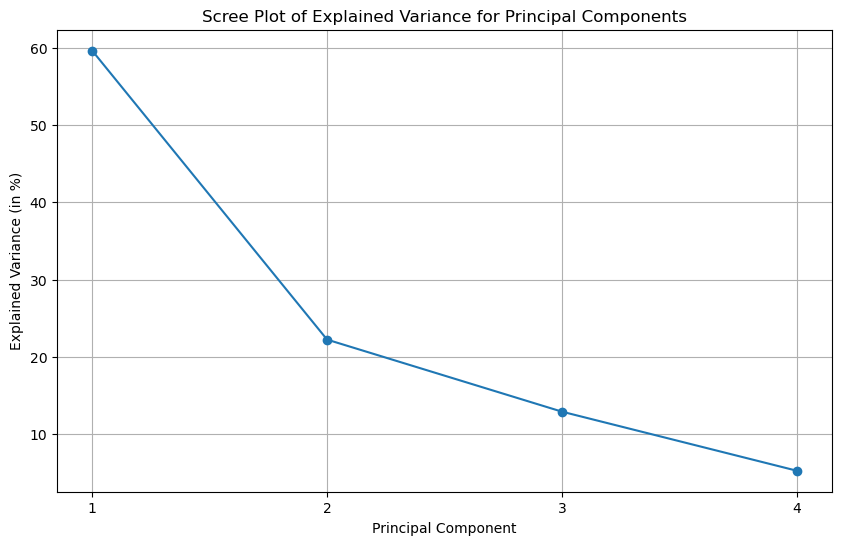

In [4]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

## Visualization of the variables

There is no current function in `scikit-learn` or `matplotlib` that allow us to simply plot the **correlation circle plot**. This means that we manually add arrows and variable to the plot, using `plt.arrow()` and `plt.annotate()` functions from [matplotlib](https://python-graph-gallery.com/matplotlib/).

By multiplying the transposed matrix (`T()` function) of principal components by the square root (`np.sqrt()` function) of the explained variance ratios, we are scaling the principal component vectors (`loadings`) by the square root of their contribution to the total variance. This scaling ensures that the `loadings` properly **represent the relationships** between the original variables and the principal components **in terms of variance**.

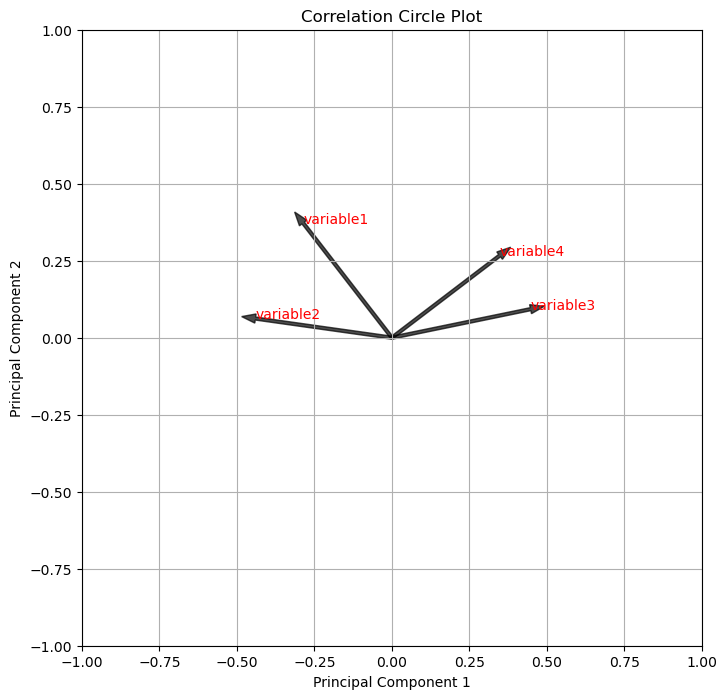

In [5]:
# Get the explained variance ratios for the selected components
explained_variances = pca.explained_variance_ratio_

# Get the principal component vectors (also known as loadings)
loadings = pca.components_.T * np.sqrt(explained_variances)

# Set figsize and other layout parameters
plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add variable labels to the plot
for i, feature in enumerate(df.columns):

    # Add the name of the variable near the arrow
    plt.annotate(feature, # variable name
                 (loadings[i, 0],
                  loadings[i, 1]),
                 color='red')
    
    # Add an arrow representing the variable on the new axis
    plt.arrow(0, 0,
              loadings[i, 0],
              loadings[i, 1],
              color='black',
              alpha=0.7, 
              width=0.01,
             )

# Fix x-axis between -1 and 1 is important for better visualization
plt.xlim(-1,1)
plt.ylim(-1,1)

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

## Visualization of the observations

This graph is easy to make, since it's a simple [scatter plot](https://python-graph-gallery.com/scatter-plot/). The particularity lies in the fact that the **axes are the variables artificially created** by `PCA`.  

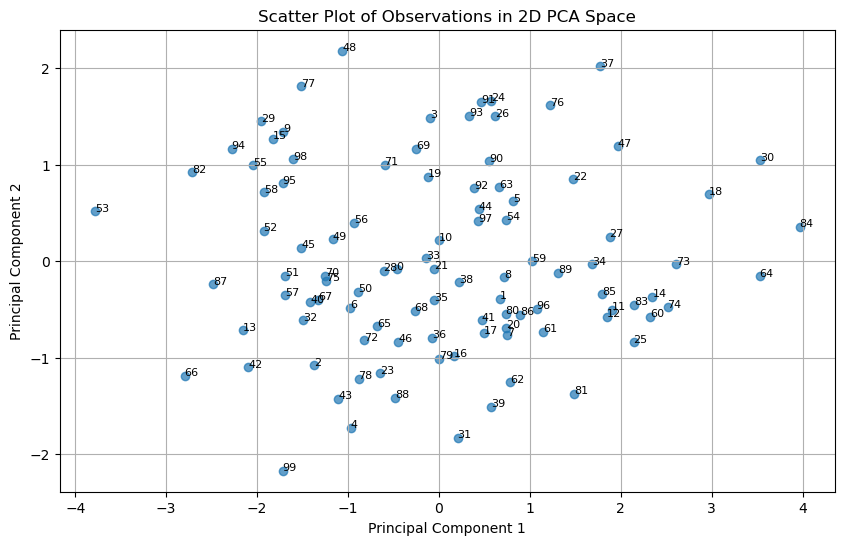

In [7]:
# Create a scatter plot to visualize the observations in the 2D PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], # position on the first principal component of the observations
            pca_results[:, 1], alpha=0.7) # position on the second principal component of the observations

# Add title and axis label
plt.title('Scatter Plot of Observations in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# (optionally) Add labels to each point based on their index in the original dataframe
for i, txt in enumerate(df.index):
    plt.annotate(txt, (pca_results[i, 0], pca_results[i, 1]), fontsize=8)
    # This might be useful when doing outlier detection

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

## Going further

This article explains how to create **very important visualizations** when working with `PCA`.

If you want to see how to create better [scatter plot](https://python-graph-gallery.com/scatter-plot/), [barplot](https://python-graph-gallery.com/barplot/) or chart with [annotations](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/), check out the gallery. 